In [4]:
#data Visualization 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Load Text Cleaning Pkgs and Transformers
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer


# Load ML Pkgs
# Estimators
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC



AttributeError: partially initialized module 'nltk' has no attribute 'data' (most likely due to a circular import)

In [2]:
df = pd.read_csv("BBC News Train.csv")

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB
None


In [4]:
df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [5]:
len(df['Text'][0])

1866

In [6]:
# Value Counts
df['Category'].value_counts()

sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64

<AxesSubplot:xlabel='Category', ylabel='count'>

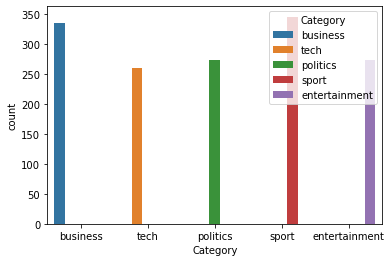

In [7]:
# Plot
# Article dstribusion across category
sns.countplot(x='Category',   hue = 'Category', data=df)

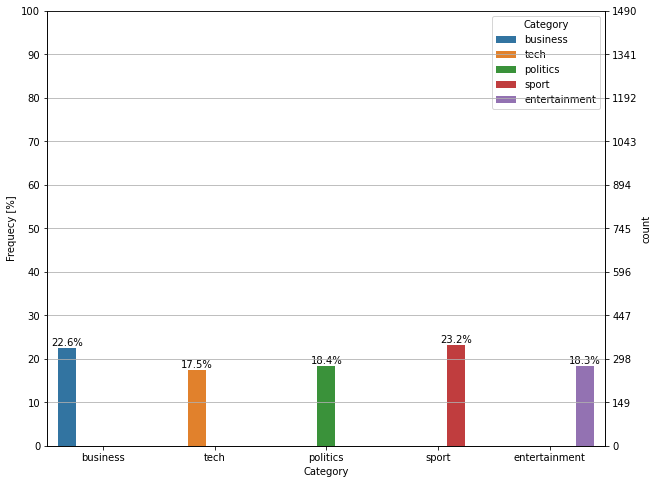

In [8]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(x = 'Category',  hue = 'Category', data = df)
ax2 = ax.twinx()
ax2.yaxis.tick_left()
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax2.yaxis.set_label_position('left')
ax2.set_ylabel('Frequecy [%]')
ncount = len(df)

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100*y/ncount),(x.mean(),y), ha='center', va='bottom')
    ax.yaxis.set_major_locator(ticker.LinearLocator(11))
    ax2.set_ylim(0,100)
    ax.set_ylim(0, ncount)

    ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))
    ax2.grid(None)

In [15]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vaishnavi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vaishnavi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Vaishnavi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Vaishnavi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [5]:
def lemmatize(text):
    text = text.split()
    wordnet = WordNetLemmatizer()
    text = [wordnet.lemmatize(word) for word in text ]
    return " ".join(text)

In [6]:
def remove_special_characters(text):
    text = re.sub("<br\\s*/?>", " ", text)
    text = re.sub("[^a-zA-Z']", " ", text)
    text = re.sub("-", " ", text)
    return text

In [1]:
def preprocess(data):
    combo = []
    for i in range(0,len(data)):
        text = remove_special_characters(data['Text'][i])
        text = text.lower()
        combo.append(text)
    df = pd.DataFrame(combo)
    return df

In [ ]:
data = preprocess(df)

In [19]:
tfidf = TfidfVectorizer(
                              sublinear_tf= True,
                              max_features=800,
                              min_df= 5,
                              norm= 'l2',
                              encoding= 'latin-1',
                              ngram_range= (1, 2),
                              stop_words= 'english',
                              lowercase= True

    )

In [20]:

train_cat = {'sport':0, 'tech': 1, 'business': 2, 'entertainment': 3 ,'politics': 4}
y_trn = df.replace({'Category': train_cat})


In [44]:
len(y_trn['Category'])

1490

In [52]:
df['Text'][0]

'worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.  cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy.  prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a  green light  to the procedures and practices used by worldcom. mr ebb

IndexError: string index out of range

In [22]:
X_train= tfidf.fit_transform(df.Text_tokenized).toarray()
X_train

AttributeError: 'DataFrame' object has no attribute 'Text_tokenized'

In [161]:
corpus = {
 'case1' : ' Cádiz is in style it has just been included in The New York Times’ list of 52 Places to Go in 2019. The recognition comes on the back of acknowledgment from TripAdvisor, which last year ranked Cádiz eighth on its list of European Destinations On The Rise for 2018.The journalist Andrew Ferren, who wrote about Cádiz for The New York Times’ list, lives in Spain himself and is no stranger to the southern province’s charms. “I am fascinated by its mix of atmospheres,” he says. “You leap from places as sophisticated and cultured as Jerez de la Frontera to wild landscapes that take your breath away, such as the beach in Bolonia or Alcornocales Park. It’s like the Wild West of southern of Spain.”“Despite the fact that Cádiz was historically a major maritime link between America and Europe, it’s not very well known to the US public and it’s really worth a visit,” he adds. There are three main reasons why The New York Times recommends a trip to CádizCulinary delightsAponiente restaurant in El Puerto de Santa María.Aponientrestaurant in El Puerto de Santa María.Suggestions include the new Western-style gastrobar Saja River, recently opened on Santa Elena street, and Código de Barra in La Candelaria Square. Ferren also suggests crossing the bay from the capital to Puerto de Santa María, where Angel León has his three-starred Michelin restaurant offering “a lyrical poem of seafood.” Just 40 km from here, León has another restaurant within the Meliá Sancti Petri hotel called Alevante, which has just been awarded its first Michelin star. For something more casual, there is La Taberna del Chef del Mar, another of the chef’s brands in El Puerto.To these suggestions, EL VIAJERO adds several of its own, including Restaurante Café Royalty, which opened opened in 1912, and the bookshop café La Clandestina (José del Toro, 23), which serves scrumptious breakfasts. There is also La Candela (Feduchy, 13) for tapas, while an exquisite combo of Andalusian and Norwegian fare is served at Patría restaurant, located on the hillside of Muela in Vejer de la Frontera.Jerez de la Frontera and its wineriesBodegas Lustau, en Jerez de la Frontera (Cádiz).ampliar fotoBodegas Lustau, en Jerez de la Frontera (Cádiz). NEIL FARRIN GETTY IMAGESAround 36 km to the north of Cádiz lies Jerez de la Frontera, known for the fortified wines known in English as sherry. Wineries from the region known as Marco de Jerez (comprising Jerez proper, El Puerto and Sanlúcar) preserve their unique 18th and 19th-century atmosphere. Ferren recommends Díez-Mérito, Lustau and Bodegas Tradición. Foodies are told to seek out Lú in Jerez, owned by the chef JuanLu FernándezThe NMAC Montenmedio FoundationVejer de la Frontera.ampliar fotoVejer de la Frontera. GETTY IMAGESThe NMAC Montenmedio Foundation of contemporary art sits between Barbate and Vejer de la Frontera. It is a private gallery exhibiting works by artists who are asked to come up with projects inspired by the local history and landscape. The center has work by Olafur Eliasson, James Turrell, Marina Abramovic, Pascale Marthine Tayou, Maurizio Cattelan and Santiago Sierra.EL VIAJERO expands on Ferren’s recommendations with a few of its own1.The Cádiz CarnivalThe Cádiz carnival.ampliar fotoThe Cádiz carnival.An unique and fun festival that takes place from February 28 to March 10. In fact it is so unique that it is applying to be included on the World Intangible Cultural Heritage list.2. Barrio del PópuloThe Pópulo neighborhood.ampliar fotoThe Pópulo neighborhood. RAQUEL M. CARBONELL GETTYThis is the oldest neighborhood in Cádiz and features an old Roman theater, the old cathedral and stone arches that lead to bohemian bars such as Pay Pay (Silencio, 1), a former brothel that now has live music, dance, improv and stand-up comedy. 3. Cádiz à la HavanaCathedral square in Cádiz.ampliar fotoCathedral square in Cádiz. RAQUEL M. CARBONELL GETTYStroll from the colonial-style Mina Square, with its ficus and palm trees, to the Provincial Museum containing Phoenician sarcophagi, to Campo del Sur avenue which was converted into a Havana esplanade for the 2002 James Bond movie Die Another Day.4. A wealth of historyBaelo Claudia Roman site in Tarifa (Cádiz).ampliar fotoBaelo Claudia Roman site in Tarifa (Cádiz). KEN WELSH GETTYStanding on the frontier between two continents, the province of Cádiz has a long and action-packed history, while its capital is one of the oldest cities in Europe. Remnants of yesteryear can be seen at a number of archeological sites, including Baelo Claudia, Carteia and Doña Blanca.5. Sanlúcar de BarramedaSummer beach horse races in Sanlúcar de Barrameda.ampliar fotoSummer beach horse races in Sanlúcar de Barrameda. JUAN CARLOS TOROFamous for its summer horse racing on the beach as well as for its wineries, this coastal town has been described by journalist Mariló García as a “dazzling city in Cádiz that boasts history, exquisite seafood, a city center with a mix of palaces and wineries as well as the incomparable landscape of Doñana Natural Park.”6. Coast and mountainsOlvera, a white village in Cádiz.ampliar fotoOlvera, a white village in Cádiz. RUDI SEBASTIAN GETTYCádiz has miles of windswept beaches that make it a perfect haunt for surfers of various descriptions. In less than an hour, however, you can be in the hills visiting quintessentially Andalusian white villages such as Medina Sidonia, Grazalema and Ubrique.7. The flamenco routeLocated in San Fernando, the Peña Flamenca Camarón de la Isla, named after the famous singer, has shows every week and is a good place to tune into some authentic flamenco artistry.8. Conil de la FronteraThe beach in Conil de la Frontera.ampliar fotoThe beach in Conil de la Frontera. GETTY IMAGESThere are three national parks that stretch along Cádiz’s Atlantic coast – La Breña, Los Alcornocales and el Estrecho – as well as beaches such as Conil de la Frontera which has the best beach bars around for watching the sun go down. 9. Surfing in TarifaIn the inlets of Los Lances and Valdevaqueros in Tarifa, wind and kitesurfers can skid across the water with a view of Africa in front and El Estrecho national park behind them.10. The white villagesNineteen districts in the Cádiz mountains take you through a string of white villages – Alcalá del Valle, Algar, Algodonales, Arcos de la Frontera, Benaocaz, Bornos, El Bosque, Espera, El Gastor, Grazalema, Olvera, Prado del Rey, Puerto Serrano, Setenil de las Bodegas, Torre Alhaquine, Ubrique, Villaluenga del Rosario, Villamartín and Zahara de la Sierra. The villagers still whitewash their homes with lime as they did in the past, normally once a year before the local fiestas.'
, 'case2': ' Vodafone España has informed representatives of its employees that it is putting a collective dismissal plan into action that will affect a maximum of 1,200 workers, 24% of its total workforce in Spain of 5,000 people. The layoffs, news of which was broken by EL PAÍS in November, have been justified by the telecoms giant due to the obligation to reduce costs due to a fall in earnings caused by a continuous reduction of prices.“In the current market climate, demand for services continues to grow exponentially, but this is not the case with prices,” the company stated in a press release. “Nearly 50% of net new customers are associated with low- or medium-cost offers, something that obliges Vodafone to have a cost structure that is prepared to successfully compete in all segments.”Vodafone added that the current expectations of clients, “who demand an agile, simple and immediate relationship [with their operator],” is prompting the firm to seek “a more simplified organizational model that strengthens coordination and synergies between teams.”As such, the company continued, it is looking to “reverse the negative trend of the business, strengthen sustainability, protect our capacity to invest and design a more competitive organization that adapts better to what our customers are asking for.”The operator says that it is sure it can reach a deal with labor unions so that the measures are as painless as possible. The redundancies will likely take effect at the end of February or the beginning of March.Vodafone has suffered a great deal in the trade war that was sparked by its rivals Movistar and Orange, after the company opted not to buy the rights for Champions League or La Liga soccer matches on the basis of low returns. The strategy has prompted an exodus of clients from their broadband internet, mobile and pay-TV services.In the first three quarters of 2018, Vodafone has lost 361,000 cellphone lines (70,000 of which were contracts), 134,000 broadband customers, and 108,000 pay-TV subscriptions. The operator has only seen positive numbers in fiber optic internet, where it has put on 84,000 customers.The operator executed a similar collective dismissal plan (known in Spanish as an ERE) in 2015, reaching a deal with the main labor unions UGT and STC, and which meant the firing of 1,509 workers – 238 fewer than those initially proposed by the company. Vodafone justified those sackings based on the duplication of roles caused by the purchase of rival operator ONO in 2014, and the absorption of the company’s workforce.Before the acquisition of ONO, Vodafone also executed an ERE in 2013. On that occasion, the company agreed with unions on the firing of 620 employees, the externalization of services, which affected 130 workers, and changes in the conditions of another 150 people.'
  , 'case3':'Elon Musk told the world in late 2017 that Tesla was taking its automotive know-how and applying it to a totally new challenge self-driving big rigs. But one year later, he placed the Tesla Semi fourth on a list of priorities for the company, behind the upcoming Model Y compact SUV and an electric pickup truck. This week, Daimler executed a move many years in the making by announcing its own big rig (albeit diesel-powered) outfitted with semi-autonomous technology. And others are following suit.The German automaker also committed to manufacturing the truck this summer, with deliveries scheduled for later this year. It pledged 500 million euros over the next few years to the continued development of an autonomous big rig, and said it has hired hundreds of employees to move the tech forward. And just like it did when it unveiled the prototype version in 2015, Daimler gave us a ride in the truck to get a taste of what the near future of trucking will look like.While there are a few Tesla Semi prototypes on the road now, and a dozen or so big name companies have placed preorders for the trucks, it doesn’t look like a production version is coming any time soon. Tesla still hasn’t said where or exactly when it will build the trucks, and would likely need to raise more money (or sell a hell of a lot more Model 3s) to fund the project.DAIMLER FIRST SHOWED OFF A PROTOTYPE IN 2015This has left the door wide open for companies like Daimler, the parent company of Mercedes-Benz. Daimler announced it was working on its own self-driving big rig in 2015 when it showed off a working prototype called the Freightliner Inspiration Truck. The automaker went big, debuting the truck on the Hoover Dam and offering test rides at Las Vegas Motor Speedway. This week at the Consumer Electronics Show, Daimler returned to Las Vegas to make good on its promise with a production version of that prototype truck.the new Cascadia is not much more advanced than the prototype was in 2015. In fact, the technology is still pretty limited. Daimler says it’s the first Class 8 commercial truck with Level 2 autonomy (referring to the Society of Automotive Engineers’ scale for self-driving definitions), meaning the driver is in control, but is supported heavily by the truck’s technology in certain situations. In that sense, the new Cascadia essentially has the same basic driver assistance technology many modern cars offer, including automatic lane centering, adaptive cruise control, and emergency braking.The Freightliner Inspiration Truck at the event in 2015.But the new Cascadia is doing this with a limited set of sensors. There’s a forward-facing camera, a forward-facing radar, a second radar sensor on the right side of the truck. That package pales in comparison to the dozens of cameras, ultrasonic sensors, and radars you’d find powering Autopilot, let alone the Tesla Semi, which is supposed to have a beefed-up version of this same sensor suite.This helps keep costs down, but means the technology is more in line with what you’d find powering something like Nissan’s ProPilot driver assistance feature as opposed to Autopilot, or even Audi’s supposedly Level 3 system, which uses similar tech, but relies on LIDAR as well.DAIMLER’S TRUCK HAS MORE IN COMMON WITH NISSAN’S PROPILOT SYSTEM THAN TESLA’S AUTOPILOTKeeping with a theme of less is more, there’s also no camera-based monitoring system in the truck to make sure the driver pays attention while using the Level 2 features. Instead, the Cascadia uses a system similar to the one found in Tesla’s cars.A sensor in the steering column measures resistance applied to the steering wheel. If the driver takes their hands off the wheel while using the lane centering feature, the instrument cluster will, after about 15 seconds, surface a warning that tells them to place their hands back on the wheel. If the driver doesn’t do that, the warning changes from yellow to red. After another 60 seconds, if the driver still hasn’t put their hands back on the wheel, the truck will come to a stop on the side of the road.The new Cascadia is a far cry from a fully autonomous truck, but based on my brief ride, Daimler has refined the technology compared to the prototype version. The prototype swayed on the highway during my two-mile demo ride in 2015, ping-ponging between the lane markers. The new truck, meanwhile, felt locked to the center of the lane during this week’s ride, which followed the same exact route from a few years ago.A Daimler representative also told me that, while lane centering is on, the driver can even choose where the system places them in the lane. (For example, if a driver is on a tight one-lane highway and wants to avoid clipping oncoming traffic, they could tell the truck to hug the right lane line.) This is another sign that system is maturing from what debuted in 2015, though it’s a small one.RELATEDThis is what it’s like to ride in Daimler’s self-driving semi truckDaimler promised some other modern technologies are coming the new Cascadia, though none of it was on display in the preproduction trucks being used for the demonstration. The company plans to offer an optional 10-inch touchscreen in the dashboard, and a 12-inch digital cluster behind the steering wheel. The truck will be able to receive over-the-air software updates, too.The Cascadia won’t be as stuffed with tech as the Tesla Semi, nor is it as sleek. But it will be available later this year. Daimler has argued that bringing automation to trucking will help squeeze better fuel efficiency out of the millions of miles that its big rigs cover every year. It would decrease the toll those miles take on the drivers. Most importantly, it could help reduce the some 4,000 fatalities that result from crashes involving these massive hunks of machinery. If all goes well, we might have a sense by the end of this year of whether any of that is true.'
  , 'case4':'Spain has agreed to host the soccer final of the Copa Libertadores between Argentina teams River Plate and Boca Juniors. The match will take place on December 9 at the Santiago Bernabéu stadium in Madrid.The final in Madrid is a punch in the soul to all fans of soccer in ArgentinaONLINE SPORTS DAILY OLEthe final was set to take place in Argentina but was suspended twice after fans turned violent. The first time, on November 25, riot police were called in after supporters of River began throwing stones and bottles at the bus carrying Boca players. Pepper spray used to control the crowds ended up affecting members of the soccer team. The players later shared photos of their injuries. The match was rescheduled but again had to be suspended after fans descended into violence.In view of the insecurity, the South American Football Confederation (Conmebol), which organizes the competition, decided the only solution was to hold the game in a different country. On Thursday, Spanish Prime Minister Pedro Sánchez said Spain would be “willing to organize the Copa Libertadores final between River and Boca” in a message on Twitter, and an hour later Conmebol president Alejandro Domínguez confirmed the game would take place in Madrid.Embedded videoSebastián Lisiecki sebalisieckiAsí fue la llegada de Boca al Monumental. Pésimo la seguridad q los mete entre toda la gente de River, los jugadores no tienen q hacer gestos, tienen q.jugar adentro. La Policía no controló y después tiró gas pimienta. Insólito todo. Quinto mundo7:23 PM - Nov 24, 2018637 people are talking about thisTwitter Ads info and privacyThis was how Boca arrived at Monumental stadium. The security that got between the all people of River was terrible. Players shouldnt have to make gesture, they should play. The police did not control the situation and then pepper gas was thrown. Unbelievable. Fifth world.This is the first time a Copa Libertadores game has been played outside the Americas since the competition began in 1960. Domínguez however was positive about the decision “[Madrid] has the largest Argentine community overseas, Barajas is the airport with the best connection to Latin America, and it is a city with a great soccer culture.”But the feeling in Argentina has been less optimistic. The national newspaper La Nación wrote that “it represents, in some way, the structural failure of our soccer, which is unable to organize the best final in the history of the [Copa] Libertadores.” Online sports daily Ole agreed “The final in Madrid is a punch in the soul to all fans of soccer in Argentina. Ten thousands kilometers away, River-Boca is an unhappy attempt to transform the classic into a Champions League event.” According to a survey run by Ole, 76% of respondents think it is bad that the game has been moved to Spain.Security riskIn a message on Twitter, Sánchez promised that "security forces have extensive experience of these situations and are already working on the necessary deployments to ensure the event is secure." Despite these assurances, there are concerns there is not enough time to properly secure the event. According to sources familiar with the security operations, between four and six weeks are needed to analyze the security needs of high-risk sporting stadiums and the ensuing preparations can take up to eight months. In the case of the Copa Libertadores final, security officials will have just days to prepare.River and Boca have a long-standing rivalry fueled largely by the class divide between the teams – River attracts wealthy, upper-class supporters while Boca is known for its working-class fans.Scheduling issuesThe final will take place on Sunday, December 9, on the final day of a three-day national holiday in Spain for Constitution Day on December 6. Madrid receives its highest number of visitors in these dates. In 2017, 600,000 visitors came to the capital, and the hotel occupancy rate was over 80%.Conmebol president Alejandro Domínguez on Tuesday.Conmebol president Alejandro Domínguez on Tuesday.Many details about the game have yet to be revealed, including how tickets will be sold, what system will be used and who can buy tickets. In Argentina, fans of the visiting team are banned from the stadiums.Conmebol and soccer club representatives began considering destinations for the match on Tuesday including Doha, the capital of Qatar and the host of the 2022 FIFA World Cup, which offered attractive economic incentives and Miami, which was ruled out by the US Soccer Federation.'
  , 'case5' :'The obesity epidemic has been on the rise for years, with cases nearly tripling since 1975, according to the World Health Organization (WHO). And the outlook for the future is equally bleak – and that includes Spain, a country that is famed for the positive effects of its supposedly Mediterranean diet.An investigation by the Mar de Barcelona hospital has found that 80% of men and 55% of women will be overweight by 2030. If the current trend continues, the researchers write, within 11 years more than 27 million people in Spain will be overweight.Being overweight can mean a higher risk of suffering a number of diseases, including diabetes, hypertension, stroke and cancerThe study, published in the Spanish Cardiology Magazine, points out that this epidemic will mean costs of €3 billion for the country’s health system.The issue, the experts state, is not an esthetic one, but rather a question of health. Being overweight can mean a higher risk of suffering a number of diseases, including diabetes, hypertension, stroke, cancer and other cardiovascular conditions.Researchers at the Barcelona hospital revised all of the scientific literature published in Spain on epidemiology and the prevalence of obesity and excess weight between 1987 and 2014 in order to come up with an accurate picture of the state of the country’s residents. “We found the trends and we cross-referenced them with data covering the general population from the National Statistics Institute in order to estimate the figures of obesity and excess weight,” explains Álvaro Hernáez, the chief researcher on the project. The results revealed an “alarming future.”There are currently 25 million people with excess weight, three million more than a decade agoDR ALBERT GODAY, AUTHOR OF THE STUDY“There are currently 25 million people with excess weight, three million more than a decade ago,” explains Dr Albert Goday, another author of the study. “In a conservative scenario, if this trend continues, there will be another three million more – 16% more cases – by 2030.”“In men, excess weight is more usual up to the age of 50,” explains Goday. “From 50 onward, obesity rises among women. These are issues that are intrinsically linked to hormonal metabolism. From a certain age, it is harder for women to control their weight.”The experts argue that any weight loss, no matter how small, reduces the risk of contracting one of the associated illnesses. “We aren’t going to find the key to this or a vaccination overnight,” Goday adds. “But any minor intervention will help to reduce the risk. You might think that you have made a huge effort and have only lost four kilos when you need to lose many more, but you must bear in mind that those four kilos are already reducing the risk.”'
   , 'case6' :'Disputes have already broken out within the new political alliance that is working to end 36 years of rule by the Socialist Party (PSOE) in Spain’s southern region of Andalusia.Just hours after the far-right Vox agreed to support the Popular Party (PP)’s candidate to head the region, Juan Manuel Moreno, its demand for a specific regional department for family affairs is running into opposition from Ciudadanos (Citizens), the third party involved in the government change.These early clashes suggest it could be difficult to export the model to other parts of SpainThe PP and the liberal Ciudadanos have reached their own governing agreement in the wake of an election that undermined the Socialists’ hold on power, but they need support from Vox’s 12 newly elected lawmakers to make it a reality.Ciudadanos has refused point-blank to meet with Vox representatives, but the PP has struck its own parallel deal with the far right to ensure its support at the investiture debate, which will take place on January 15 and 16.On Friday morning, Juan Marín of Ciudadanos said that there are no plans for a separate family affairs department within the government structure they have devised with their PP partners, and which does not include Vox.The reform party has insisted that the Vox-PP deal does not affect them at all, and Ciudadanos’ national leader, Albert Rivera, said on Thursday that Vox “has had to take a step back, correct itself, and sheathe its sword,” alluding to the fact that Vox has dropped some of its most radical demands such as the deportation of 52,000 undocumented migrants.Vox national leader Santiago Abascal (c) and Andalusian leader Francisco Serrano (r).Vox national leader Santiago Abascal (c) and Andalusian leader Francisco Serrano (r). REUTERSBut Vox insists on a family department, and said it will expect loyalty from the PP on this issue. Meanwhile, Ciudadanos has also warned it will not support the PP-Vox proposal to change the historical memory law for a “concord law.”These early clashes suggest it could be difficult to export the model to other parts of Spain, where local and regional elections are scheduled to be held this year. The PP president, Pablo Casado, said on Thursday that their separate deals with Ciudadanos and Vox in Andalusia are “a preamble of what’s going to happen in May in Spain.”The PP is anxious to win back power in regions like Valencia, the Balearic Islands, Castilla-La Mancha, Aragón and Cantabria, and to retain it in Madrid, Murcia, La Rioja and Castilla y León.Parliamentary debateThe PSOE has already digested the fact that it is losing its hold on Spain’s most populated region. “We will conduct a responsible opposition, and remain vigilant about defending self-government and Andalusia’s presence in Spain,” said the party’s parliamentary spokesman, Mario Jiménez.The Socialists will not be putting forward a candidate, now that the PP nominee has enough support for an absolute majority in the first round. The debates will take place on January 15 and 16, followed by a vote, said Speaker Marta Bosquet.The sum of the PP, Ciudadanos and Vox votes is four above the 55 required for a majority. The PSOE lost 14 seats at the December 2 election, down to 33. The Podemos-backed Adelante Andalucía has 17 lawmakers.'
  , 'case7' :' polar air mass that entered the Iberian peninsula on Wednesday has already caused sharp drops in temperature, but the worst is yet to come, said the national weather service Aemet.“An episode of intense cold” is forecast for Friday, when the mercury will continue to plummet across much of Spain. Thirty provinces are on yellow alert, the lowest on a three-color scale, except for Guadalajara, where there is an orange advisory in place. Lows of -10 ºC are expected in Parameras de Molina.Elsewhere, weather stations have recorded -8.2ºC in La Molina (Girona), at an elevation of 1,700 meters, and -6.8ºC in Puerto de Navacerrada (Madrid).Almería has rolled out vehicles to deal with wintry road conditions.Almería has rolled out vehicles to deal with wintry road conditions. DIPUTACIÓN DE ALMERÍA EUROPA PRESSAemet spokesman Rubén del Campo said that the cold spell is not out of the ordinary for a month of January, and noted that “we are emerging from a warm December when temperatures were 1.2ºC above average.”Temperatures have already dipped between six and eight degrees in a matter of hours in some parts of Spain, said Del Campo. And the northerly wind will increase the feeling of cold.Temperatures on Friday and Saturday will be “very cold, with lows of five to 10 degrees below average in many parts of northern and eastern Spain, and in the Balearics,” he added.No snowHowever, little to no snow is expected “not for lack of cold, but for lack of precipitation, since the air mass is very dry.”Alerts are in place in Almería, Granada, Jaén, Aragón, Cantabria, Castilla-La Mancha, Castilla y León except for Salamanca and Valladolid, Catalonia save for Tarragona, Madrid, Navarre, the Valencia region, the Balearic Islands, La Rioja, Asturias and Murcia.On Saturday, the orange warnings will extend to Córdoba, Salamanca, Valladolid, Galicia and Lleida, where lows of -10 ºC are expected in the Vall d’Aran.'


}

In [162]:
corpus['case1']

' Cádiz is in style it has just been included in The New York Times’ list of 52 Places to Go in 2019. The recognition comes on the back of acknowledgment from TripAdvisor, which last year ranked Cádiz eighth on its list of European Destinations On The Rise for 2018.The journalist Andrew Ferren, who wrote about Cádiz for The New York Times’ list, lives in Spain himself and is no stranger to the southern province’s charms. “I am fascinated by its mix of atmospheres,” he says. “You leap from places as sophisticated and cultured as Jerez de la Frontera to wild landscapes that take your breath away, such as the beach in Bolonia or Alcornocales Park. It’s like the Wild West of southern of Spain.”“Despite the fact that Cádiz was historically a major maritime link between America and Europe, it’s not very well known to the US public and it’s really worth a visit,” he adds. There are three main reasons why The New York Times recommends a trip to CádizCulinary delightsAponiente restaurant in El 

In [170]:
X = tfidf.fit_transform([corpus['case1']]).toarray()



In [171]:
X.shape

(1, 800)

In [172]:
lr_model = LogisticRegression(C = 0.9,
                                class_weight = 'balanced',
                                multi_class = 'multinomial',
                                penalty = 'l2',
                                solver = 'newton-cg')
lr_model.fit(X_train,y_train)
y_pred_x = lr_model.predict(X)


In [173]:
y_pred_x

array([3], dtype=int64)

In [174]:
X_train,X_test,y_train,y_test = train_test_split(X_train,
                                                    y_trn,
                                                    test_size=0.20,
                                                    random_state=42)


ValueError: Found input variables with inconsistent numbers of samples: [1192, 1490]

In [167]:
print(X_train.shape)
print(X_test.shape)

(1192, 800)
(298, 800)


In [141]:
#try different algorithms
names = ["K Nearest Neighbors", "Decision Tree", "Random Forest", "Logistic Regression", "SGD Classifier",
         "Naive Bayes", "SVM Linear"]

classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
    #SGDClassifier(max_iter = 100),
    #MultinomialNB(),
    #SVC(kernel = 'linear')
]

models = zip(names, classifiers)

In [111]:
for name, model in models:
    nlp_model=model
    nlp_model.fit(X_train,y_train)
    y_pred = nlp_model.predict(X_test)
    prob = nlp_model.predict_proba(X_test)[1]
    
    test_accuracy  = accuracy_score(y_test, y_pred)
    print('{} Accuracy: {} ,Prob = {}    {}'.format(name, test_accuracy,prob,prob.max()))
    

K Nearest Neighbors Accuracy: 0.9731543624161074 ,Prob = [0. 0. 0. 1. 0.]    1.0
Decision Tree Accuracy: 0.7986577181208053 ,Prob = [0. 0. 0. 1. 0.]    1.0
Random Forest Accuracy: 0.9731543624161074 ,Prob = [0. 0. 0. 1. 0.]    1.0
Logistic Regression Accuracy: 0.9798657718120806 ,Prob = [0.00309417 0.00537273 0.00611539 0.98211881 0.0032989 ]    0.9821188093731291


In [84]:
y_pred

array([2, 3, 3, 0, 4, 1, 0, 2, 1, 0, 3, 2, 1, 4, 0, 0, 1, 4, 3, 1, 0, 2,
       4, 1, 4, 0, 1, 4, 0, 1, 4, 1, 1, 3, 4, 0, 3, 1, 2, 0, 4, 1, 3, 1,
       4, 1, 3, 0, 3, 1, 4, 4, 1, 4, 3, 2, 2, 3, 1, 2, 0, 1, 2, 0, 0, 0,
       1, 0, 3, 3, 3, 4, 4, 4, 2, 2, 1, 3, 1, 1, 1, 4, 4, 4, 1, 2, 4, 1,
       1, 0, 2, 3, 3, 0, 1, 3, 0, 0, 2, 3, 2, 3, 2, 4, 0, 4, 3, 4, 1, 0,
       0, 1, 0, 2, 0, 1, 3, 1, 2, 1, 3, 4, 1, 3, 1, 1, 0, 0, 3, 2, 1, 4,
       2, 4, 1, 3, 1, 2, 1, 2, 1, 2, 0, 4, 2, 3, 1, 0, 3, 3, 4, 1, 0, 4,
       2, 0, 0, 4, 0, 4, 4, 3, 1, 1, 3, 3, 0, 4, 4, 0, 3, 0, 0, 2, 1, 0,
       2, 4, 1, 1, 4, 4, 0, 2, 2, 1, 0, 3, 2, 3, 4, 4, 3, 0, 4, 4, 3, 4,
       4, 1, 2, 3, 4, 2, 1, 4, 0, 0, 1, 1, 4, 3, 1, 2, 4, 3, 3, 4, 0, 3,
       4, 0, 1, 1, 2, 0, 1, 3, 3, 3, 3, 4, 4, 1, 1, 0, 1, 4, 4, 3, 3, 2,
       2, 2, 1, 1, 2, 2, 4, 2, 1, 3, 0, 4, 3, 0, 2, 4, 0, 1, 1, 3, 0, 0,
       0, 4, 4, 1, 3, 2, 4, 4, 0, 4, 4, 3, 4, 4, 1, 3, 2, 1, 1, 3, 1, 1,
       1, 0, 3, 2, 1, 1, 1, 1, 3, 2, 0, 2], dtype=i

In [118]:
tfidf.fit_transform(df.Text[0])

ValueError: Iterable over raw text documents expected, string object received.

In [25]:
data_test = pd.read_csv('BBC News Test.csv')

In [26]:
data_test.head()

,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...


In [27]:
df_test = tokenization_normalization(data_test)

In [28]:
df_test_x  = tfidf.fit_transform(df_test.Text_tokenized).toarray()

In [33]:
data_pred = pd.read_csv('BBC News Sample Solution.csv')
data_pred.head()


,ArticleId,Category
0,1018,sport
1,1319,tech
2,1138,business
3,459,entertainment
4,1020,politics


In [34]:
y_test_x = data_pred['Category'].replace(['tech','business','entertainment','politics','sport'], [0,1,2,3,4])

In [52]:
for name, model in models:
    nlp_model=model
    nlp_model.fit(X_train,y_train)
    y_pred_x = nlp_model.predict(df_test_x)
    test_accuracy  = accuracy_score(y_test_x, y_pred_x)
    print('{} Accuracy: {}'.format(name, test_accuracy))

ValueError: Found input variables with inconsistent numbers of samples: [1490, 1192]

In [108]:
lr_model.predict([df_test_x[0]])

array([3], dtype=int64)

In [25]:
pd.DataFrame(
    confusion_matrix,
    index = [['actual', 'actual', 'actual', 'actual', 'actual'], ['tech','business','entertainment','politics','sport']],
    columns = [['predicted', 'predicted', 'predicted', 'predicted', 'predicted'], ['tech','business','entertainment','politics','sport']])

predicted                                      
                          tech business entertainment politics sport
actual tech                 56        1             0        0     1
       business              0       74             0        1     0
       entertainment         0        0            46        0     0
       politics              0        2             0       54     0
       sport                 0        0             0        0    63

In [ ]:
#show the svm model overfitted

In [51]:
json.dump()

NameError: name 'json' is not defined